
**Comparative Performance Analysis for Predicting Sea Level Rise Using Linear Regression and Support Vector Machine**
Objective:
In this assignment, you will analyze sea level data to predict the rise in sea levels over time using linear regression and support vector machine (SVM). You will perform data cleaning, modeling, and visualize the results. Your predictions will be used to estimate future sea levels.

**Deliverable** Upload your completed code to Canvas within the due date.

Dataset:
The dataset contains historical data on sea level measurements from the CSIRO (Commonwealth Scientific and Industrial Research Organisation). The columns of the dataset are as follows:

-- Year: The year of the measurement.

-- CSIRO Adjusted Sea Level: The adjusted sea level measurement (in millimeters).

-- Lower Error Bound: The lower bound of the sea level measurement.

-- Upper Error Bound: The upper bound of the sea level measurement.

-- NOAA Adjusted Sea Level: The NOAA adjusted sea level (containing missing values).

### Tasks: Write the code for each of the following:

* Task 1: Data Exploration and Preprocessing

-- Load and Explore the Data:

-- Load the dataset into a Pandas DataFrame.

-- Display the first few rows of the dataset to understand its structure.

-- Identify and handle any missing data.

-- Describe the dataset and summarize the statistics:


-- Identify any potential outliers or anomalies in the data.



* Task 2: Focused Prediction from Year 2000 to Present



-- Filter the data from the year 2000 to the most recent year available in the dataset.

-- Shuffle the dataset and Split the dataset into 70% train and 30% test.

-- Fit a linear regression and SVM model based on the 70% of the dataset (from 2000 to the most recent year). Use the SKLearn library.

-- Visualize the observed data and the fitted regression line for this range of years.

-- Display the values of all the weights (coefficients) obtained from Linear Regression and SVM.

* Task 3: Predict Sea Level in 2040 Using the SVM and Linear Regression:

-- Using the linear regression model and SVM (from the year 2000 onwards), predict the sea level rise using the 30% test.

-- Report the predicted sea levels from both the models.

* Task 4: Reflection and Analysis

-- Compare the predicted sea level for 2030  and 2040 from both the models.

-- Discuss how the different models might lead to different predictions and why this is the case.

* Task 5: Interpretation of Results:

-- Report a metric that you used to compare the performance of the Linear Regression and SVM. Which model performed the best?

-- Explain how the regression models are helping us understand the relationship between the year and the sea level rise.



### TASK 1: Data Exploration and Preprocessing

In [139]:
import pandas as pd

df = pd.read_csv('epa-sea-level.csv')
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


In [140]:
print("Missing values per column:")
print(df.isnull().sum())
df = df[['Year', 'CSIRO Adjusted Sea Level']]
print(df.isnull().sum())
df

Missing values per column:
Year                          0
CSIRO Adjusted Sea Level      0
Lower Error Bound             0
Upper Error Bound             0
NOAA Adjusted Sea Level     113
dtype: int64
Year                        0
CSIRO Adjusted Sea Level    0
dtype: int64


,Year,CSIRO Adjusted Sea Level
0,1880,0.000000
1,1881,0.220472
2,1882,-0.440945
3,1883,-0.232283
4,1884,0.590551
...,...,...
129,2009,8.586614
130,2010,8.901575
131,2011,8.964567
132,2012,9.326772


In [141]:
df = df.dropna()

print(df.head())
print(df.describe())

   Year  CSIRO Adjusted Sea Level
0  1880                  0.000000
1  1881                  0.220472
2  1882                 -0.440945
3  1883                 -0.232283
4  1884                  0.590551
              Year  CSIRO Adjusted Sea Level
count   134.000000                134.000000
mean   1946.500000                  3.650341
std      38.826537                  2.485692
min    1880.000000                 -0.440945
25%    1913.250000                  1.632874
50%    1946.500000                  3.312992
75%    1979.750000                  5.587598
max    2013.000000                  9.326772


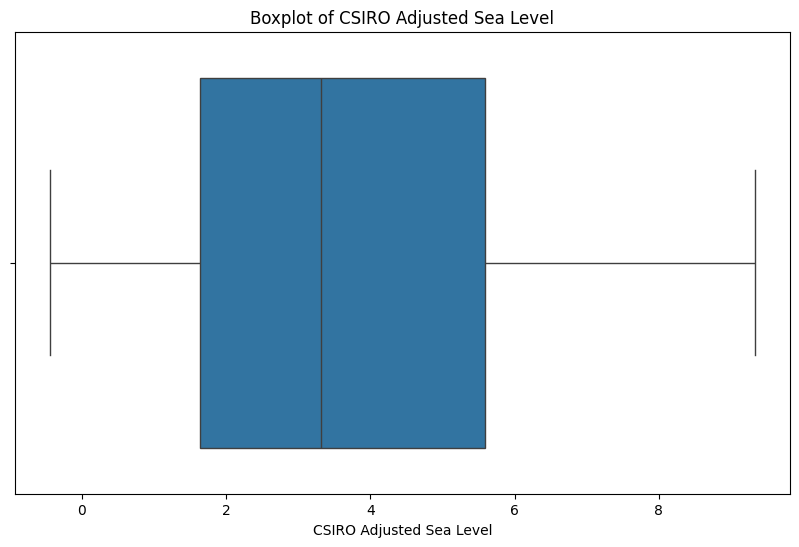

In [142]:
# Visualize data and look for outliers
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["CSIRO Adjusted Sea Level"])
plt.title("Boxplot of CSIRO Adjusted Sea Level")
plt.show()

### TASK 2: Focused Prediction from Year 2000 to Present


In [143]:

# Filter the data from the year 2000 to the most recent year available in the dataset.


# -- Visualize the observed data and the fitted regression line for this range of years.

# -- Display the values of all the weights (coefficients) obtained from Linear Regression and SVM.
df_2000 = df[df["Year"] >= 2000].copy()
df_2000


,Year,CSIRO Adjusted Sea Level
120,2000,7.062992
121,2001,7.287402
122,2002,7.381890
123,2003,7.759843
124,2004,7.740157
125,2005,7.744094
126,2006,7.917323
127,2007,7.996063
128,2008,8.350394
129,2009,8.586614


In [146]:
# Shuffle the dataset and Split the dataset into 70% train and 30% test.
from sklearn.model_selection import train_test_split
X = df_2000[["Year"]]
Y = df_2000["CSIRO Adjusted Sea Level"]
x_train, x_test,y_train,y_test = train_test_split(X,Y,train_size=0.7,random_state=0)
x_train
y_train

133    8.980315
129    8.586614
121    7.287402
127    7.996063
130    8.901575
123    7.759843
120    7.062992
125    7.744094
132    9.326772
Name: CSIRO Adjusted Sea Level, dtype: float64

In [145]:
# Fit a linear regression and SVM model based on the 70% of the dataset (from 2000 to the most recent year). Use the SKLearn library.
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
